In [146]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

import sklearn.preprocessing as preprocessing
from sklearn.preprocessing import OneHotEncoder
import sklearn.model_selection as model_selection
from sklearn.model_selection import KFold
import sklearn.linear_model as linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss

In [147]:
app_df = pd.read_csv('googleplaystore.csv')
app_df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [148]:
app_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [149]:
categorical = [var for var in app_df.columns if app_df[var].dtype=='O']
print(categorical)

['App', 'Category', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']


In [150]:
#print for values
rating = app_df["Rating"].unique()
reviews = app_df["Reviews"].unique()
size = app_df["Size"].unique()
installs = app_df["Installs"].unique()
type_ = app_df["Type"].unique()
price = app_df["Price"].unique()
content_rating = app_df["Content Rating"].unique()

In [151]:
#null check
app_df.isnull().any()
app_df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [152]:
#clean check
app_df_clean = app_df.dropna(how='any')
app_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9360 non-null   object 
 1   Category        9360 non-null   object 
 2   Rating          9360 non-null   float64
 3   Reviews         9360 non-null   object 
 4   Size            9360 non-null   object 
 5   Installs        9360 non-null   object 
 6   Type            9360 non-null   object 
 7   Price           9360 non-null   object 
 8   Content Rating  9360 non-null   object 
 9   Genres          9360 non-null   object 
 10  Last Updated    9360 non-null   object 
 11  Current Ver     9360 non-null   object 
 12  Android Ver     9360 non-null   object 
dtypes: float64(1), object(12)
memory usage: 1023.8+ KB


<h4>App Categories

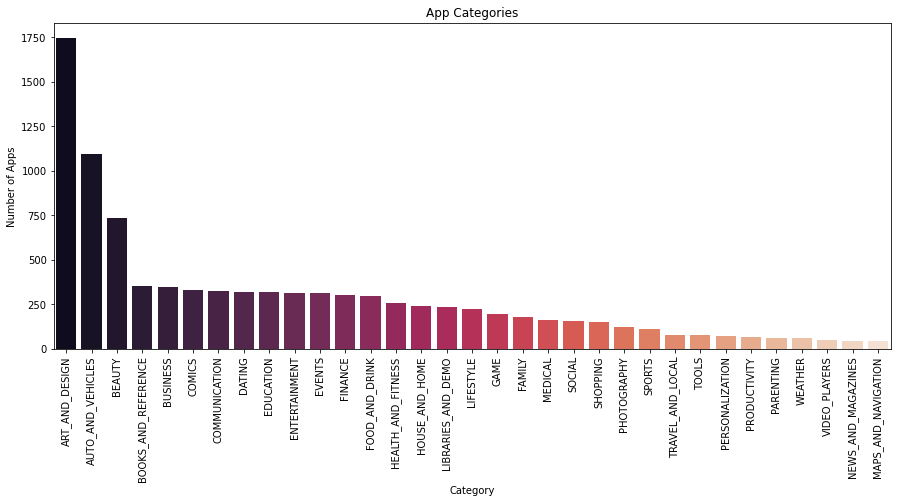

In [153]:
#cat var
cat =app_df_clean["Category"].unique()
cat_count= app_df_clean["Category"].value_counts()
cat_count_list = cat_count.tolist() #y
#cat_list = cat.tolist()

x = cat
y = cat_count_list
plt.figure(figsize=(15,6))
sns.barplot(x=x, y=y, palette="rocket")
plt.xticks(rotation='vertical')
plt.title("App Categories")
plt.xlabel("Category")
plt.ylabel("Number of Apps")
plt.show()

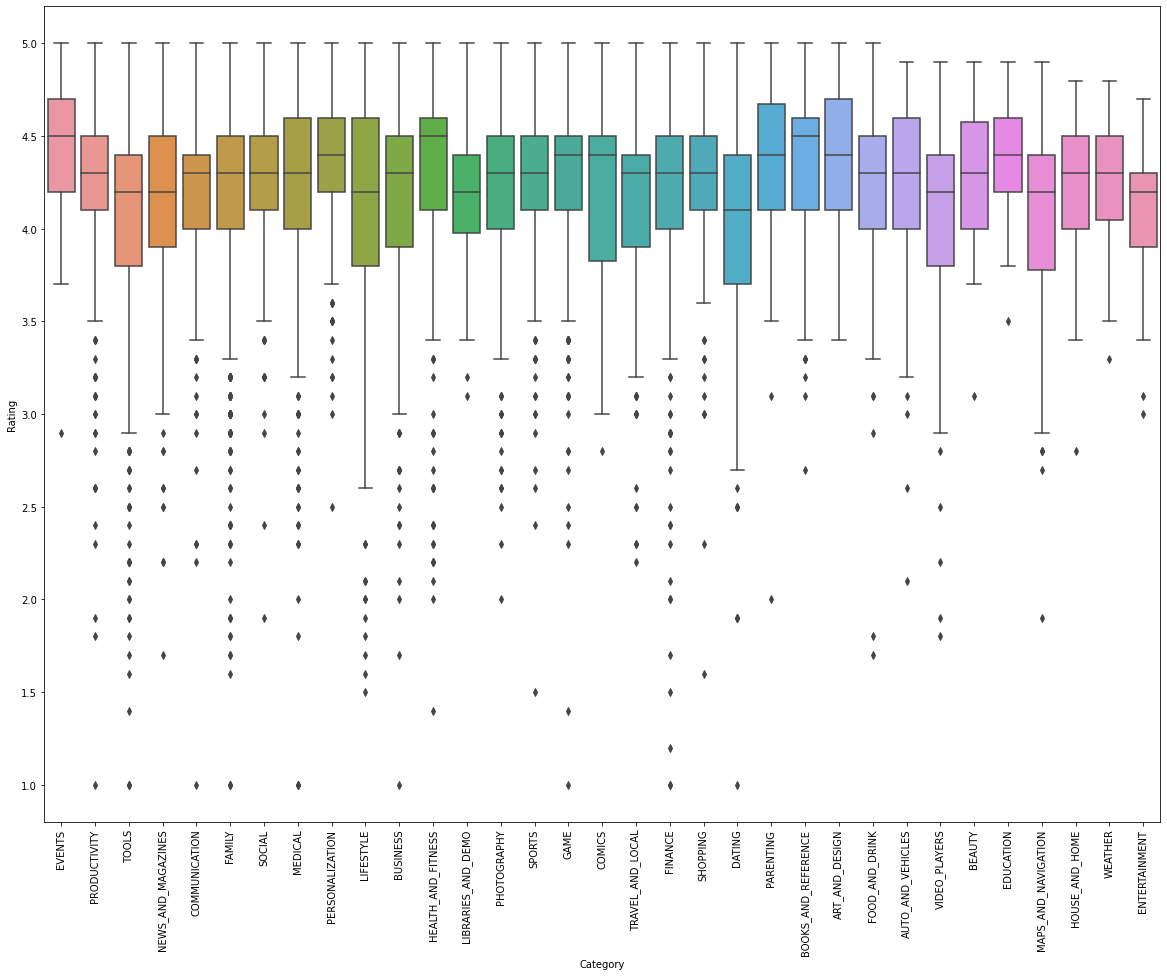

                      App
Category                 
ART_AND_DESIGN         61
AUTO_AND_VEHICLES      73
BEAUTY                 42
BOOKS_AND_REFERENCE   178
BUSINESS              303
COMICS                 58
COMMUNICATION         328
DATING                195
EDUCATION             155
ENTERTAINMENT         149
EVENTS                 45
FAMILY               1746
FINANCE               323
FOOD_AND_DRINK        109
GAME                 1097
HEALTH_AND_FITNESS    297
HOUSE_AND_HOME         76
LIBRARIES_AND_DEMO     64
LIFESTYLE             314
MAPS_AND_NAVIGATION   124
MEDICAL               350
NEWS_AND_MAGAZINES    233
PARENTING              50
PERSONALIZATION       312
PHOTOGRAPHY           317
PRODUCTIVITY          351
SHOPPING              238
SOCIAL                259
SPORTS                319
TOOLS                 733
TRAVEL_AND_LOCAL      226
VIDEO_PLAYERS         160
WEATHER                75


In [154]:
count_cat = app_df_clean.groupby(['Category']).count()
cat_df = pd.DataFrame(count_cat.App)
plt.figure(figsize=(20,15))
sns.boxplot(y='Rating',x='Category',data = app_df_clean.sort_values('Rating',ascending=False))
plt.xticks(rotation=90)
plt.show()
print(cat_df)

<h4>App Genres

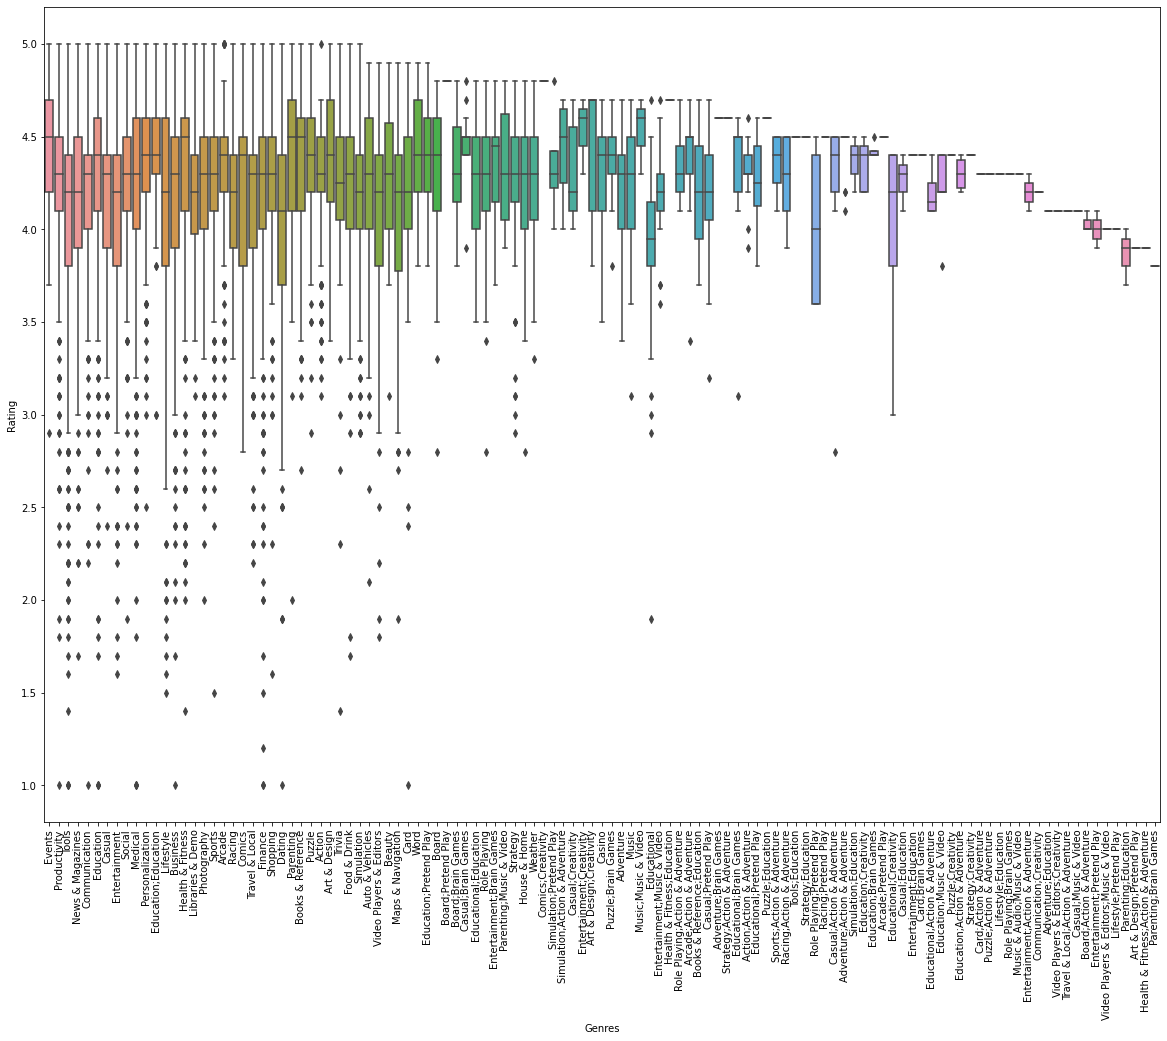

In [155]:
#pd.set_option("display.max_rows", None, "display.max_columns", None)
count_gen = app_df_clean.groupby(['Genres']).count()
gen_df = pd.DataFrame(count_gen.App)

plt.figure(figsize=(20,15))
sns.boxplot(y='Rating',x='Genres',data = app_df_clean.sort_values('Rating',ascending=False))
plt.xticks(rotation=90)
plt.show()

<h4>App Ratings

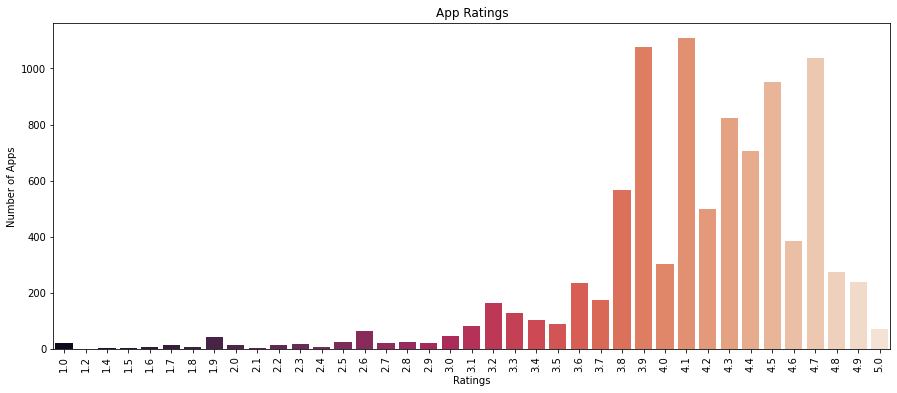

In [156]:
rating = app_df_clean["Rating"].unique()
rating_count= app_df_clean["Rating"].value_counts()
rating_count_list = rating_count.tolist() #y

x = rating
y = rating_count_list
plt.figure(figsize=(15,6))
sns.barplot(x=x, y=y, palette="rocket")
plt.xticks(rotation='vertical')
plt.title("App Ratings")
plt.xlabel("Ratings")
plt.ylabel("Number of Apps")
plt.show()

Rating Histogram, Distribution

Text(0.5, 1.0, 'Rating Distribution')

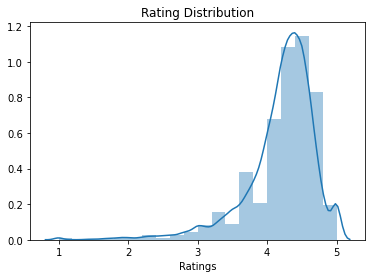

In [157]:
fig = sns.distplot(app_df_clean["Rating"], bins=20)   

fig.set_xlabel('Ratings')
plt.title('Rating Distribution')

In [158]:
min_value = app_df_clean['Rating'].min()
max_value = app_df_clean['Rating'].max()
rating_bins = np.linspace(min_value,max_value,20)
print(rating_bins)

[1.         1.21052632 1.42105263 1.63157895 1.84210526 2.05263158
 2.26315789 2.47368421 2.68421053 2.89473684 3.10526316 3.31578947
 3.52631579 3.73684211 3.94736842 4.15789474 4.36842105 4.57894737
 4.78947368 5.        ]


<h4>App Reviews 

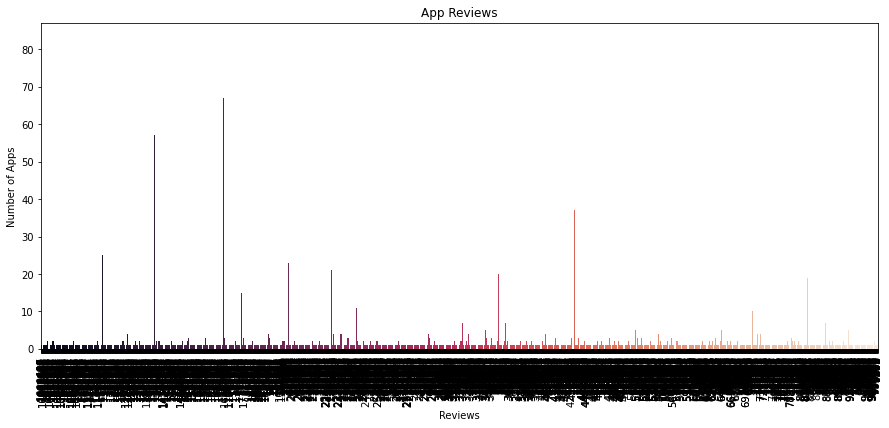

In [159]:
reviews =app_df_clean["Reviews"].unique()
review_count= app_df_clean["Reviews"].value_counts()
review_count_list = review_count.tolist() #y

x = reviews
y = review_count_list
plt.figure(figsize=(15,6))
sns.barplot(x=x, y=y, palette="rocket")
plt.xticks(rotation='vertical')
plt.title("App Reviews")
plt.xlabel("Reviews")
plt.ylabel("Number of Apps")
plt.show()

In [160]:
app_df_clean = app_df_clean.astype({'Reviews':int})

Text(0.5, 1.0, 'Reviews Distribution')

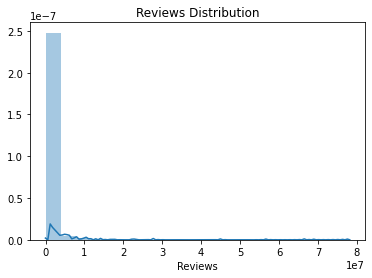

In [161]:
fig = sns.distplot(app_df_clean["Reviews"], bins=20)   

fig.set_xlabel('Reviews')
plt.title('Reviews Distribution')

In [162]:
min_value = app_df_clean["Reviews"].min()
max_value = app_df_clean["Reviews"].max()
rating_bins = np.linspace(min_value,max_value,20)
rating_bins.astype(int)

array([       1,  4113596,  8227191, 12340786, 16454381, 20567976,
       24681571, 28795166, 32908761, 37022356, 41135951, 45249546,
       49363141, 53476736, 57590331, 61703926, 65817521, 69931116,
       74044711, 78158306])

<h4>App Installs

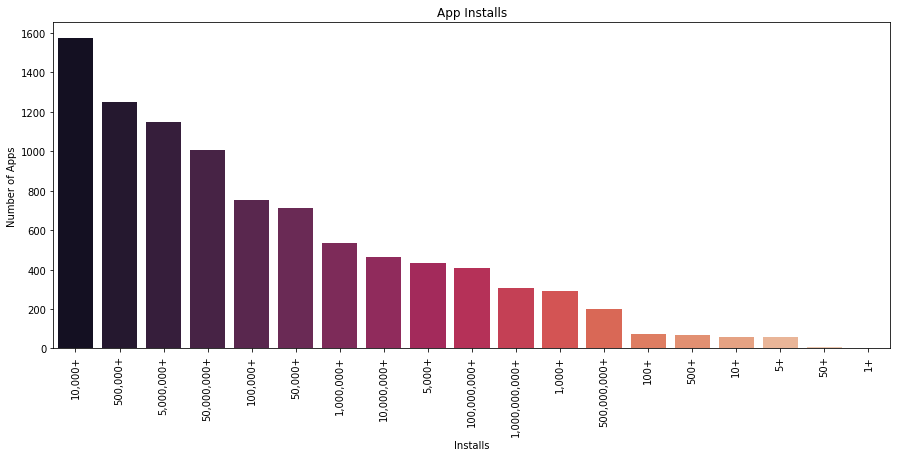

In [167]:
installs =app_df_clean["Installs"].unique()
installs_count= app_df_clean["Installs"].value_counts()
installs_count_list = installs_count.tolist() #y


x = installs
y = installs_count_list
plt.figure(figsize=(15,6))
sns.barplot(x=x, y=y, palette="rocket")
plt.xticks(rotation='vertical')
plt.title("App Installs")
plt.xlabel("Installs")
plt.ylabel("Number of Apps")
plt.show()

<h4>App Types

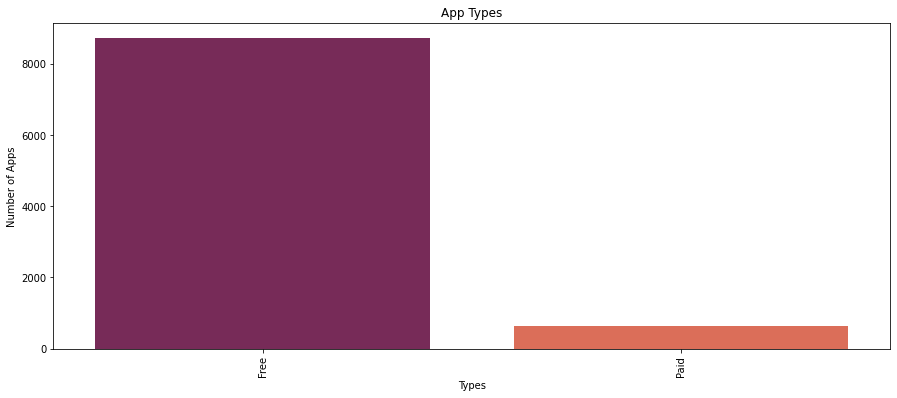

In [168]:
#cat var
type_ =app_df_clean["Type"].unique()
type_count= app_df_clean["Type"].value_counts()
type_count_list = type_count.tolist() #y
#cat_list = cat.tolist()

x = type_
y = type_count_list
plt.figure(figsize=(15,6))
sns.barplot(x=x, y=y, palette="rocket")
plt.xticks(rotation='vertical')
plt.title("App Types")
plt.xlabel("Types")
plt.ylabel("Number of Apps")
plt.show()

<h4>App Price

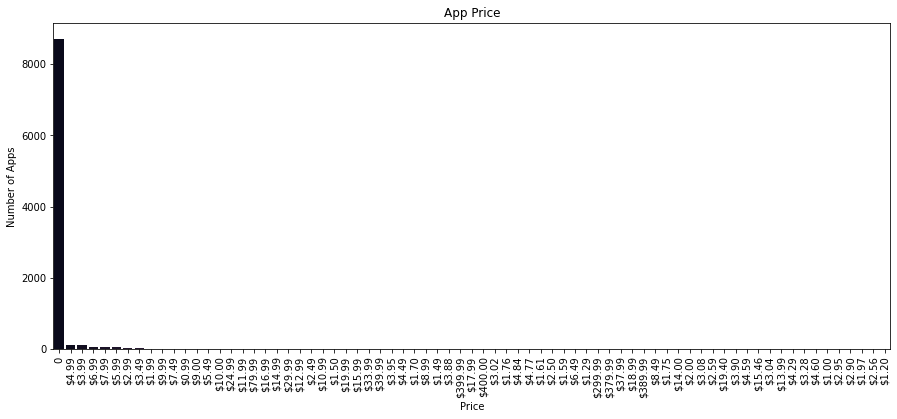

In [169]:
#cat var
price =app_df_clean["Price"].unique()
price_count= app_df_clean["Price"].value_counts()
price_count_list = price_count.tolist() #y
#cat_list = cat.tolist()

x = price
y = price_count_list
plt.figure(figsize=(15,6))
sns.barplot(x=x, y=y, palette="rocket")
plt.xticks(rotation='vertical')
plt.title("App Price")
plt.xlabel("Price")
plt.ylabel("Number of Apps")
plt.show()

<h4>App Content Ratings

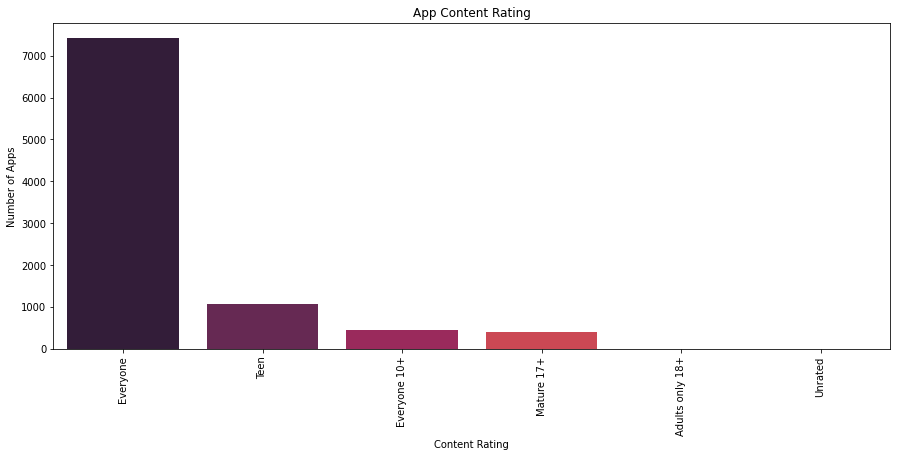

In [170]:
cr =app_df_clean["Content Rating"].unique()
cr_count= app_df_clean["Content Rating"].value_counts()
cr_count_list = cr_count.tolist() #y

x = cr
y = cr_count_list
plt.figure(figsize=(15,6))
sns.barplot(x=x, y=y, palette="rocket")
plt.xticks(rotation='vertical')
plt.title("App Content Rating")
plt.xlabel("Content Rating")
plt.ylabel("Number of Apps")
plt.show()

In [199]:
app_df_clean.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [200]:
app_df_new  = app_df_clean[['Category','Rating','Reviews','Size','Installs','Type','Content Rating']]
app_df_new.head()

,Category,Rating,Reviews,Size,Installs,Type,Content Rating
0,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,Everyone
1,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,Everyone
2,ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,Everyone
3,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,Teen
4,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,Everyone


<b>Re-setting Columns 

In [201]:
reviews = app_df_new["Reviews"].unique()
print(reviews)

[   159    967  87510 ...    603   1195 398307]


In [202]:
app_df_new = app_df_new.astype({'Reviews':int})

In [203]:
size = app_df_new["Size"].unique()

In [204]:
app_df_new = app_df_new[app_df_new.Size != 'Varies with device']
app_df_new['Size'] =app_df_new['Size'].replace({'k': '*1e3', 'M': '*1e6'}, regex=True).map(pd.eval).astype(int)
#optional size conversion 
#app_df_new['Size'] =app_df_new['Size'].replace({'k': '*.001', 'M': '*1'}, regex=True).map(pd.eval).astype(float)

In [205]:
installs = app_df["Installs"].unique()
print(installs)

['10,000+' '500,000+' '5,000,000+' '50,000,000+' '100,000+' '50,000+'
 '1,000,000+' '10,000,000+' '5,000+' '100,000,000+' '1,000,000,000+'
 '1,000+' '500,000,000+' '50+' '100+' '500+' '10+' '1+' '5+' '0+' '0'
 'Free']


In [206]:
app_df_new['Installs'] = app_df_new['Installs'].apply(lambda x : x.strip('+').replace(',', ''))
app_df_new['Installs'] = app_df_new.Installs.astype(int)

In [207]:
type_ = app_df_new["Type"].unique()
print(type_)

content_rating = app_df_new["Content Rating"].unique()
print(content_rating)

['Free' 'Paid']
['Everyone' 'Teen' 'Everyone 10+' 'Mature 17+' 'Adults only 18+' 'Unrated']


In [208]:
#app_df_new = app_df_new[app_df_new.Price != 'Everyone'] 
#app_df_new['Price'] = app_df_new['Price'].apply(lambda x : x.strip('$'))
#app_df_new['Price'] = app_df_new.Price.astype(float)

<h4>One-hot encoded dataframe for use after determining feature_importance

In [209]:
categorical = [var for var in app_df_new.columns if app_df_new[var].dtype=='O']
print(categorical)

['Category', 'Type', 'Content Rating']


In [210]:
# Apply one-hot-encoding to the new dataframe

# Select the numeric columns
numeric_subset = app_df_new.select_dtypes('number')
categorical_subset = app_df_new.select_dtypes('object')

# One hot encoding
categorical_subset = pd.get_dummies(categorical_subset[categorical_subset.columns])
#drop Rating column
#numeric_subset = numeric_subset.drop("Rating", axis=1)

# Join the two dataframes 
# Make sure to use axis = 1 to perform a column bind
features = pd.concat([numeric_subset, categorical_subset], axis = 1)
features.head()

,Rating,Reviews,Size,Installs,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,...,Category_VIDEO_PLAYERS,Category_WEATHER,Type_Free,Type_Paid,Content Rating_Adults only 18+,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
0,4.1,159,19000000,10000,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
1,3.9,967,14000000,500000,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
2,4.7,87510,8700000,5000000,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
3,4.5,215644,25000000,50000000,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,4.3,967,2800000,100000,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0


<h4>Correlation plot for features dataframe (using one-hot encoded sub-sets)</h4>
To determine categorical tier value weight importance.

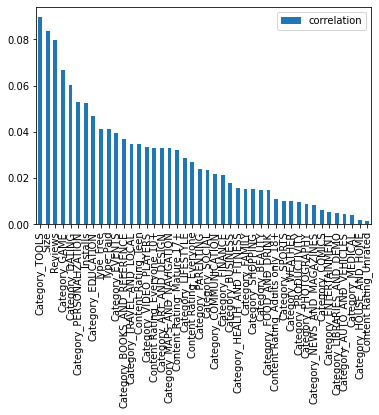

,correlation
Category_TOOLS,0.089536
Size,0.083640
Reviews,0.079819
Category_GAME,0.066667
Category_DATING,0.060074
Category_PERSONALIZATION,0.053027
Installs,0.052693
Category_EDUCATION,0.047088
Type_Free,0.041180
Type_Paid,0.041180


In [211]:
correlation = pd.DataFrame({'correlation' : features.corr()["Rating"].abs().sort_values(ascending=False)[1:]})

correlation.plot(kind="bar")
plt.show()

correlation.head(10)

<h4>get_dummies to complete feature processing of app_df_new

In [212]:
#enc = preprocessing.LabelEncoder() 
#app_df_new['Genres'] = enc.fit_transform(app_df_new['Genres'])

app_df_new['Content Rating'] = pd.get_dummies(app_df_new['Content Rating'])

app_df_new['Type'] = pd.get_dummies(app_df_new['Type'])

app_df_new['Category'] = pd.get_dummies(app_df_new['Category'])

In [225]:
#re-order columns for target
app_df_new = app_df_new[['Rating','Category','Reviews','Size','Installs','Type','Content Rating']]
app_df_new.head()

,Rating,Category,Reviews,Size,Installs,Type,Content Rating
0,4.1,1,159,19000000,10000,1,0
1,3.9,1,967,14000000,500000,1,0
2,4.7,1,87510,8700000,5000000,1,0
3,4.5,1,215644,25000000,50000000,1,0
4,4.3,1,967,2800000,100000,1,0


<h5>app_df_new correlation - numerical values, dummies encoded (w/o sub-sets)

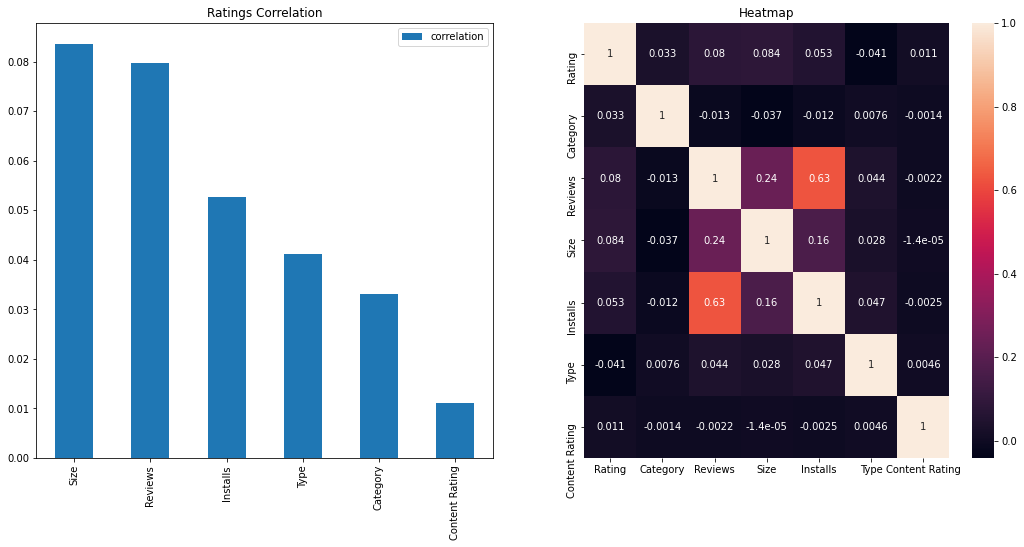

In [227]:
# visualize frequency distribution of Purchased/Unpurchased
f,ax=plt.subplots(1,2,figsize=(18,8))

correlation = pd.DataFrame({'correlation' : app_df_new.corr()["Rating"].abs().sort_values(ascending=False)[1:]})
ax[0] = correlation.plot(kind="bar", ax=ax[0])
ax[0].set_title('Ratings Correlation')

#f, ax = plt.subplots(figsize=(6, 8))
ax[1] = sns.heatmap(data=app_df_new.corr(),annot=True);
ax[1].set_title("Heatmap")
plt.show()


In [228]:
correlation

,correlation
Size,0.083640
Reviews,0.079819
Installs,0.052693
Type,0.041180
Category,0.033079
Content Rating,0.011114


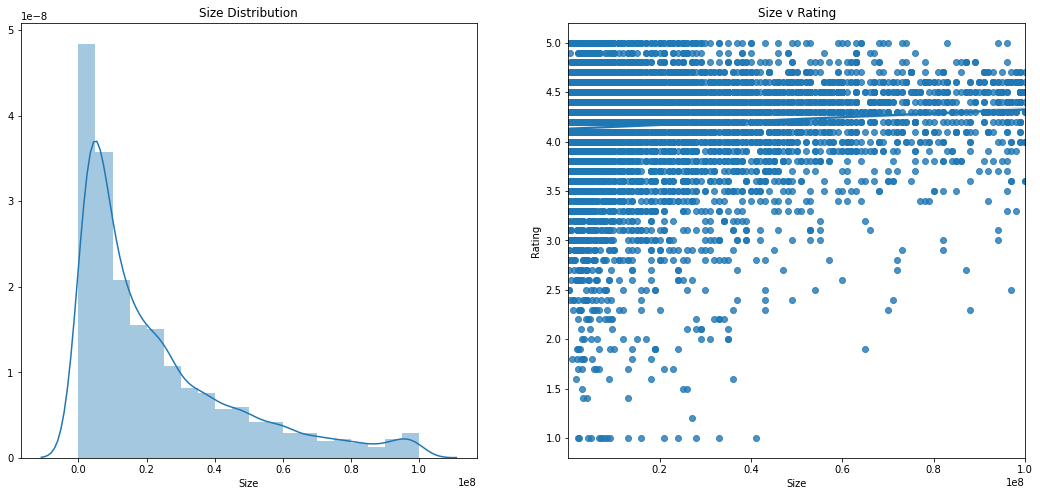

In [243]:
f,ax=plt.subplots(1,2,figsize=(18,8))

ax[0] = sns.distplot(app_df_new["Size"], bins=20, ax=ax[0]) 
ax[0].set_title('Size Distribution')
ax[0].set_xlabel('Size')
#f, ax = plt.subplots(figsize=(6, 8))
ax[1] = sns.regplot(data=app_df_new,x='Size',y='Rating')
ax[1].set_title("Size v Rating")
plt.show()

<h4>Scatter Size, Rating

<AxesSubplot:xlabel='Size', ylabel='Rating'>

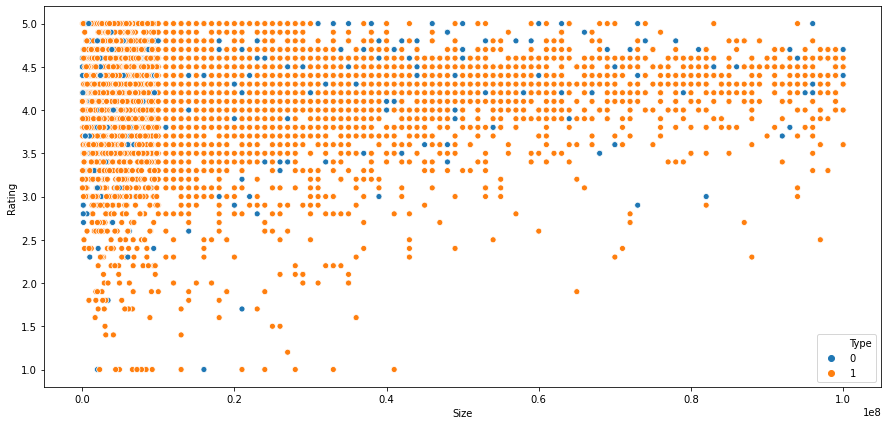

In [197]:
plt.figure(figsize=(15,7))
sns.scatterplot(data=app_df_new,x='Size',y='Rating',hue='Type')

<h4>Scatter Reviews, Rating 

<AxesSubplot:xlabel='Reviews', ylabel='Rating'>

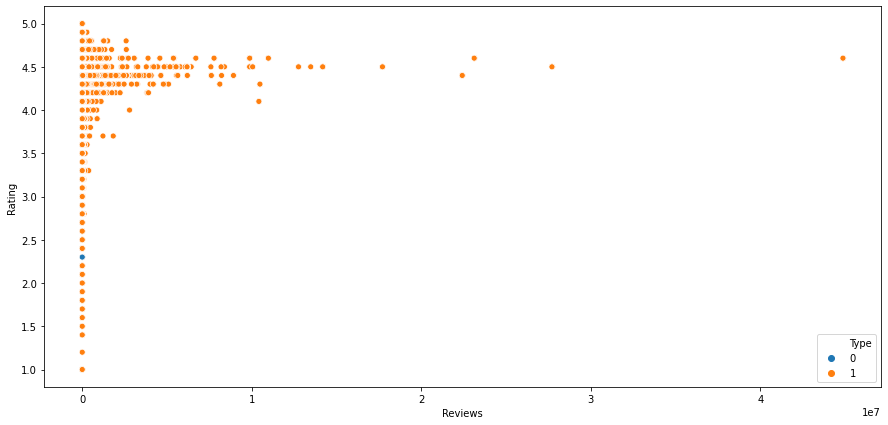

In [135]:
plt.figure(figsize=(15,7))
sns.scatterplot(data=app_df_new,x='Reviews',y='Rating',hue='Type')

<h4>Random Forest Regressor to determine Feature, Permutation Importance

In [136]:
X=app_df_new.iloc[:,1:]
y=app_df_new.iloc[:,0]

In [137]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)

RandomForestRegressor()

<h4>Feature Importance

Text(0.5, 0, 'Random Forest Feature Importance')

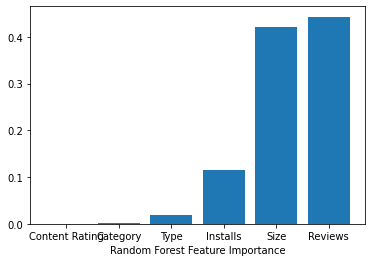

In [138]:
rf.feature_importances_

sorted_idx = rf.feature_importances_.argsort()
plt.bar(X_train.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

<h4>Permutation Importance

Permutation based importance can be used to overcome drawbacks of default feature importance computed with mean impurity decrease. As arguments it requires trained model and validation (test data). This method will randomly shuffle each feature and compute the change in the model’s performance. The features which impact the performance the most are the most important one.

Text(0.5, 0, 'Permutation Importance')

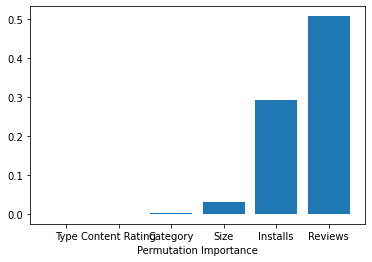

In [139]:
from sklearn.inspection import permutation_importance
perm_importance = permutation_importance(rf, X_test, y_test)

sorted_idx = perm_importance.importances_mean.argsort()

plt.bar(X_test.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

<h4>Multi-class Classification Models

In [140]:
features.head()

,Rating,Reviews,Size,Installs,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,...,Category_VIDEO_PLAYERS,Category_WEATHER,Type_Free,Type_Paid,Content Rating_Adults only 18+,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
0,4.1,159,19000000,10000,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
1,3.9,967,14000000,500000,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
2,4.7,87510,8700000,5000000,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
3,4.5,215644,25000000,50000000,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,4.3,967,2800000,100000,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0


In [249]:
#Continuoos Variables for Scaling
features = ['Reviews','Size','Installs']
X = app_df_new[features]
y = app_df_new['Rating'].values
y

array([4.1, 3.9, 4.7, ..., 4.5, 5. , 4.5])

In [250]:
#label encoder for target App Rating (can not target continuous variables)
lab_enc = preprocessing.LabelEncoder()
y= lab_enc.fit_transform(y)
y= y.astype(int)

<b>Normalization

In [251]:
from sklearn.preprocessing import MinMaxScaler #normalization 0:1
mms = MinMaxScaler()
mms.fit(X)
data_transformed = mms.transform(X)
dataset = pd.DataFrame(data_transformed)
print(dataset.describe())

                 0            1            2
count  7723.000000  7723.000000  7723.000000
mean      0.006569     0.229639     0.008424
std       0.041519     0.234516     0.050157
min       0.000000     0.000000     0.000000
25%       0.000002     0.052919     0.000010
50%       0.000052     0.139927     0.000100
75%       0.000870     0.329943     0.001000
max       1.000000     1.000000     1.000000


Normalization used to scale features 'Reviews', 'Size', 'Installs' on a 0 to 1 scale. Best used when feature values do not follow a gaussian distribution. Applied only to continuous variables. <br>
In this case it is not applied to target variable 'Rating'.<br><b>
MinMaxScaler class of sk.learn.preprocessing is used for Normalization.

<b>Standardized Scaling

In [246]:
from sklearn.preprocessing import StandardScaler #Standardization - mean:0, STD:1 to normalize distribution 
trans = StandardScaler()
data_standard = trans.fit_transform(X)
dataset_standard = pd.DataFrame(data_standard)
print(dataset_standard.describe())
dataset_standard.head()

                  0             1             2
count  7.723000e+03  7.723000e+03  7.723000e+03
mean  -1.072433e-16 -6.464357e-16  3.987372e-15
std    1.000065e+00  1.000065e+00  1.000065e+00
min   -1.582226e-01 -9.792668e-01 -1.679635e-01
25%   -1.581655e-01 -7.535983e-01 -1.677641e-01
50%   -1.569719e-01 -3.825663e-01 -1.659697e-01
75%   -1.372699e-01  4.277336e-01 -1.480250e-01
max    2.392890e+01  3.285107e+00  1.977056e+01


,0,1,2
0,-0.158138,-0.169329,-0.167764
1,-0.157704,-0.382566,-0.157994
2,-0.111271,-0.608597,-0.068271
3,-0.042523,0.086555,0.828963
4,-0.157704,-0.860217,-0.165970


Standardization used to scale features 'Reviews, 'Size', 'Installs' by centering the features at a mean of 0 with a (unit) standard deviation of 1 so that the feature columns have the same parameters as standard normal distribution. Unlike normalized distribution it maintains useful outlier information while remaining less sensitive to them. It does not have a bounding range. <br><b>
StandardScaler class of sk.learn.preprocessing is used for Standardization.

In [ ]:
'''success option
success = [(app_df_new['Rating'] >=4.2),
          (app_df_new['Rating'] <4.2)]
values = ['Success', 'Not Success']
app_df_new['Success'] = np.select(success, values)
app_df_new.head()
'''